# DecisionTreeClassifier

Tujuannya adalah membuat model yang dapat membantu memprediksi spesies penguin berdasarkan atribut fisik, kemudian dapat menggunakan model tersebut untuk membantu peneliti mengklasifikasikan penguin di lapangan, daripada membutuhkan ahli biologi yang berpengalaman

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# memuat data
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\penguins_size.csv')

In [3]:
# menampilkan 5 baris pertama
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## EDA - exploratory data analysis

In [4]:
# menampilkan jumlah baris dan kolom
df.shape

(344, 7)

In [5]:
# ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# ringkasan statistik
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
# nemampilkan nilai null
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
# persen nilai null
print(f'Persentase nilai null:', '{0:.1f}%'.format(100*(10/344)))

Persentase nilai null: 2.9%


In [9]:
# menghapus data kerena nilai null kurang dari 10%
df = df.dropna()

In [10]:
# pengecekan data ganda 
df.duplicated(subset=None).sum()

0

In [11]:
# menampilkna nama kolom
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
# menampilkan data yang bebeda pada kolom species
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
# nemapilkan dat yang berbeda pada kolom island
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
# menghapus '.' pada kolom sex
df = df[df['sex']!='.']

In [15]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [16]:
plt.style.use(['science','notebook','grid'])

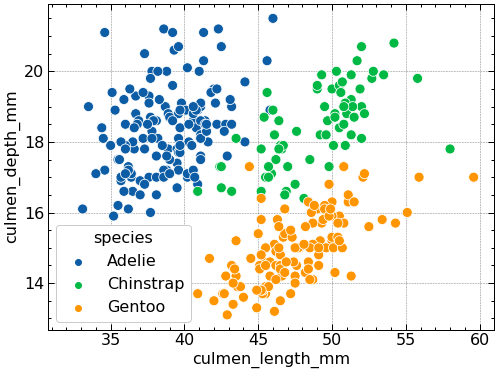

In [17]:
# menampilkan sebaran data culmne berdasrkan species
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm', hue='species', data=df, s=100);

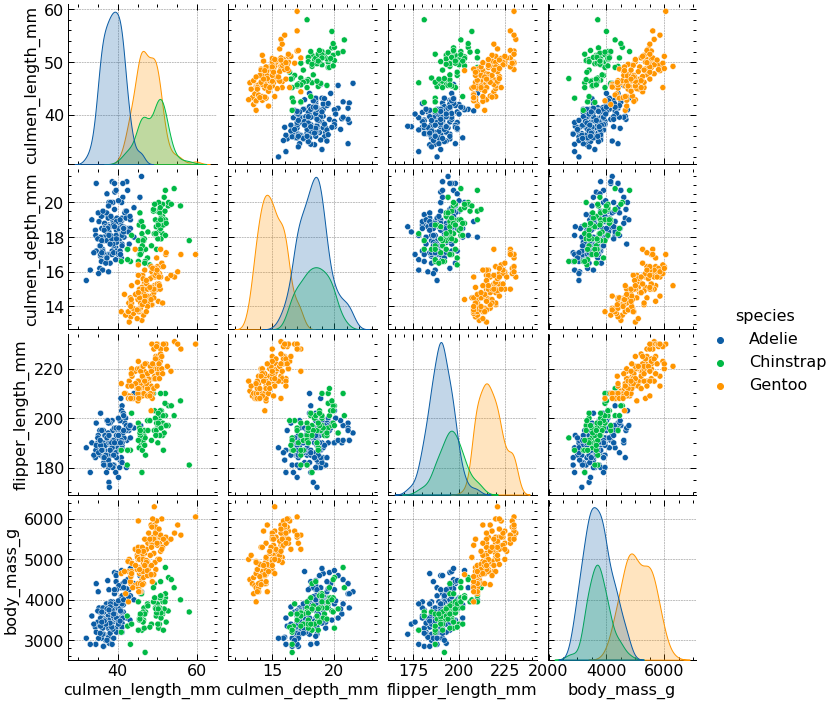

In [18]:
# menapilkan semua sebaran data berdasarkan kolom species 
sns.pairplot(df, hue='species');

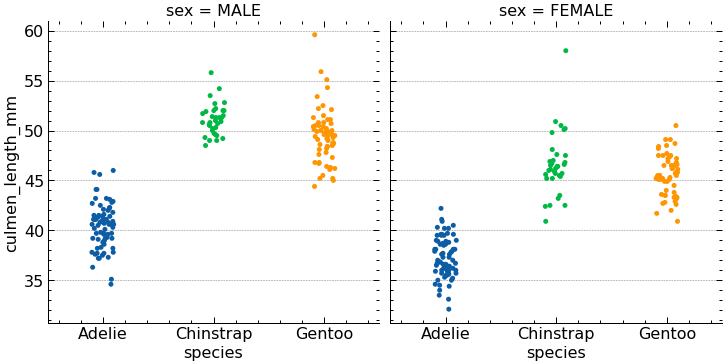

In [19]:
# sebaran data species yang di bagi berdasarkan jenis kelamin
sns.catplot(x='species', y='culmen_length_mm', col='sex',data=df);

In [20]:
# merububah variabel kategori menjadi indikator
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


# Split data

In [21]:
# menetapkan data feature dan target
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# membagi data menjadi data training dan data tes
# data train 80 % dan data test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

## Preprocesing Scale data
mengubah data Anda sedemikian rupa sehingga distribusinya akan memiliki nilai rata-rata 0 dan standar deviasi 1 . Mengingat distribusi data, setiap nilai dalam dataset akan memiliki nilai rata-rata sampel dikurangi, dan kemudian dibagi dengan standar deviasi dari seluruh dataset.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Model Decision tree dan Hyperparamater Tuning GridSearchcCV

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#help(DecisionTreeClassifier)

In [30]:
model = DecisionTreeClassifier()

In [31]:
# suatu atribut pada DecisionTreeClassifier untuk mendapatkan nilai terbaik
criterion = ['gini', 'entropy']
max_depth = [2,3,4]
max_features = [1,2,3,4,5,6,7,None]

In [32]:
param_grid  = {'criterion': criterion,
              'max_depth': max_depth,
              'max_features' : max_features
              }

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

In [35]:
grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, None]})

In [36]:
# model yang di pilhkan oleh grisearchcv setelah data di training
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=7)

In [37]:
grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 7,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
grid.best_estimator_.feature_importances_

array([0.34450403, 0.04774302, 0.57412932, 0.        , 0.03362363,
       0.        , 0.        ])

In [39]:
pd.DataFrame(index = X.columns, data=grid.best_estimator_.feature_importances_, columns=['importances'])

,importances
culmen_length_mm,0.344504
culmen_depth_mm,0.047743
flipper_length_mm,0.574129
body_mass_g,0.000000
island_Dream,0.033624
island_Torgersen,0.000000
sex_MALE,0.000000


In [40]:
imp_features = pd.DataFrame(index = X.columns, data=grid.best_estimator_.feature_importances_, columns=['importances']).sort_values(ascending=False, by='importances')

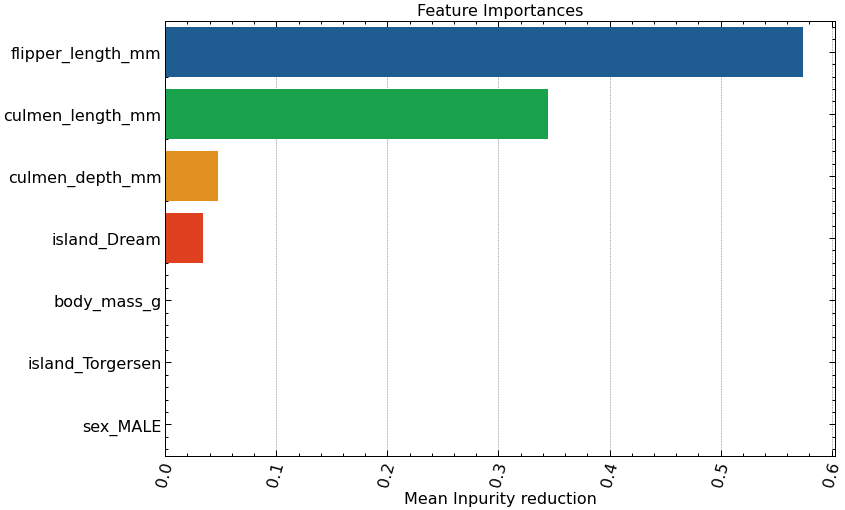

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(y=imp_features.index, x=imp_features.importances)
plt.xlabel('Mean Inpurity reduction')
plt.title('Feature Importances')
plt.xticks(rotation=75)
plt.show()

dari plot diatas dapat di simpulkna bahwa fitur flipper_length_mm sangat membantu pada model kita untuk membedakan jenis species pada pinguin

In [42]:
preds = grid.predict(X_test_scaler)

## Evaluasi model

In [43]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [44]:
confusion_matrix(y_test, preds)

array([[30,  1,  0],
       [ 1, 15,  0],
       [ 1,  0, 19]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


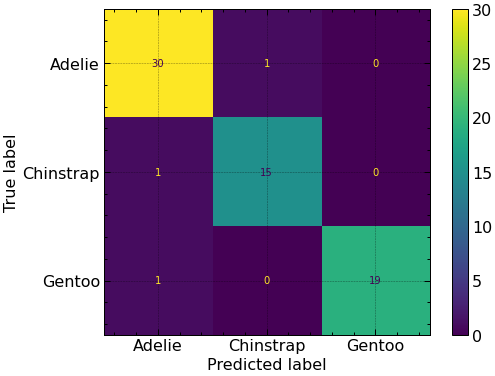

In [45]:
plot_confusion_matrix(grid, X_test_scaler, y_test)

In [46]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



In [47]:
accuracy_score(y_test, preds)

0.9552238805970149

In [48]:
from sklearn.tree import plot_tree

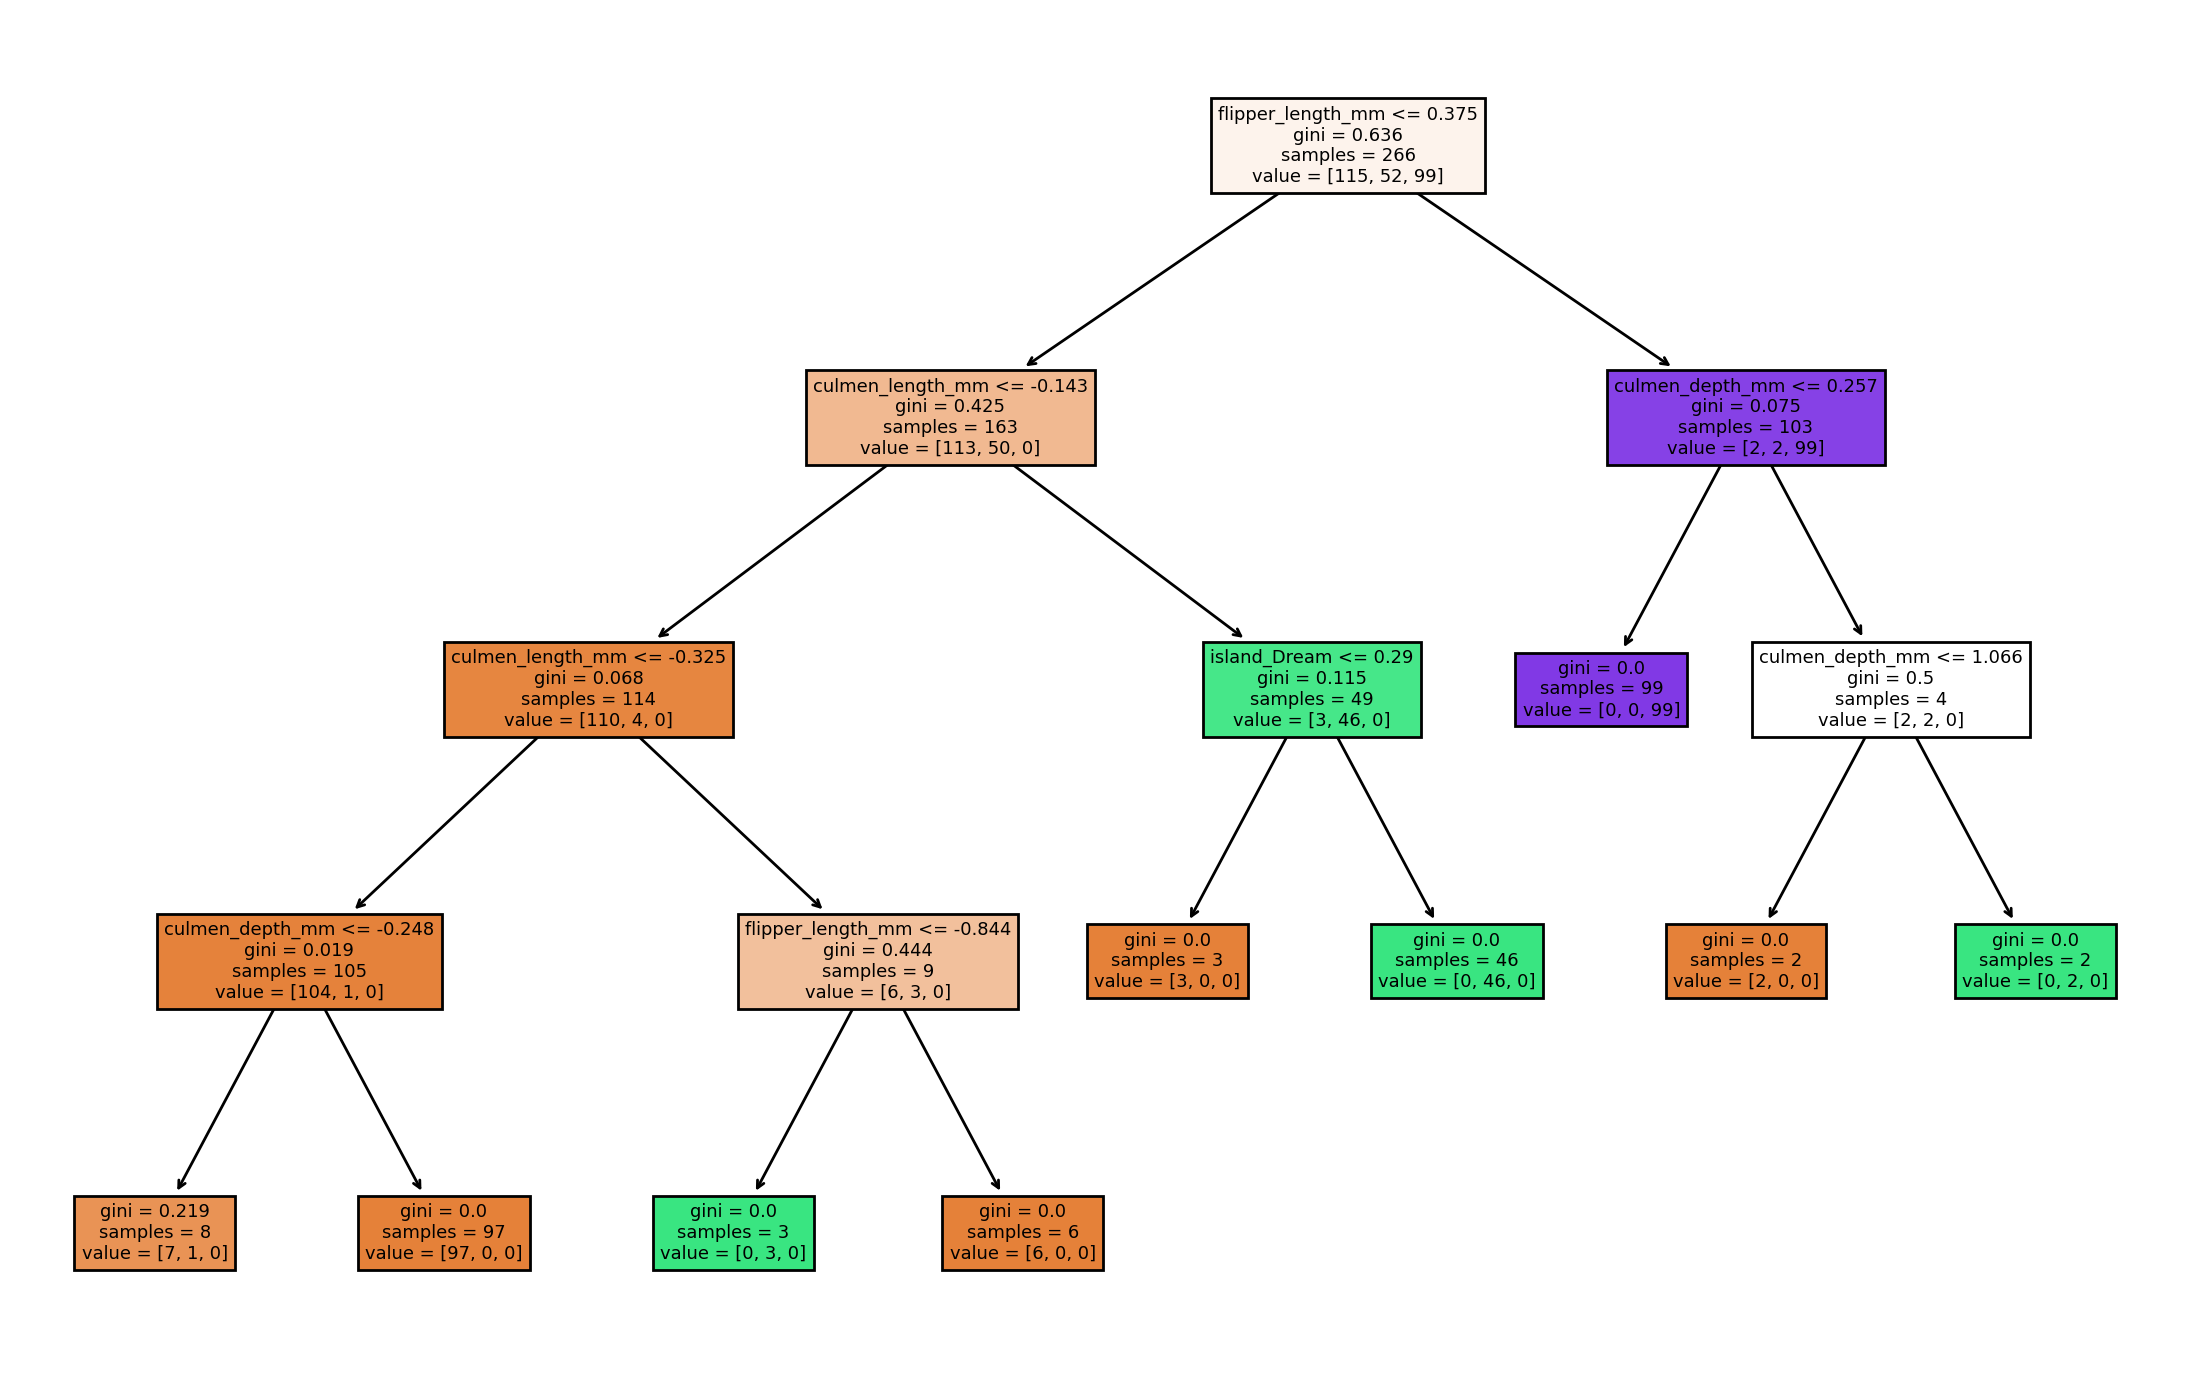

In [49]:
plt.figure(figsize= (14, 9), dpi =200)
plot_tree(grid.best_estimator_, feature_names =X.columns, filled=True);